In [2]:
import pandas as pd

# Чтение файла с разделителем табуляции
df = pd.read_csv('new-site.csv', delimiter='\t')

# Вывод первых нескольких строк файла
print(df.head())


   site  dwell-time
0     0           2
1     1          48
2     0          15
3     1          16
4     0          38


In [5]:
# Суммарное время пребывания для группы А
total_time_A = df[df['site'] == 0]['dwell-time'].sum()

# Суммарное время пребывания для группы B
total_time_B = df[df['site'] == 1]['dwell-time'].sum()

# Вывод результатов
print(f"Суммарное время группы A: {total_time_A}")
print(f"Суммарное время группы B: {total_time_B}")


Суммарное время группы A: 16898
Суммарное время группы B: 10032


In [6]:
# Среднее время пребывания для группы А
mean_time_A = df[df['site'] == 0]['dwell-time'].mean()

# Среднее время пребывания для группы B
mean_time_B = df[df['site'] == 1]['dwell-time'].mean()

# Округление до целого числа
mean_time_A = round(mean_time_A)
mean_time_B = round(mean_time_B)

# Вывод результатов
print(f"Среднее время группы A: {mean_time_A}")
print(f"Среднее время группы B: {mean_time_B}")


Среднее время группы A: 91
Среднее время группы B: 88


In [7]:
from scipy.stats import shapiro

# Проведение теста Шапиро-Уилка для группы A
stat_A, p_A = shapiro(df[df['site'] == 0]['dwell-time'])

# Проведение теста Шапиро-Уилка для группы B
stat_B, p_B = shapiro(df[df['site'] == 1]['dwell-time'])

# Вывод результатов
print(f"Группа A: статистика = {stat_A}, p-значение = {p_A}")
print(f"Группа B: статистика = {stat_B}, p-значение = {p_B}")


Группа A: статистика = 0.731232632199737, p-значение = 4.499873552750829e-17
Группа B: статистика = 0.7305351552861856, p-значение = 3.5727031185288115e-13


In [9]:
from scipy.stats import mannwhitneyu

# Данные для группы A и группы B
group_A = df[df['site'] == 0]['dwell-time']
group_B = df[df['site'] == 1]['dwell-time']

# Проведение U-теста Манна-Уитни
stat, p = mannwhitneyu(group_A, group_B, alternative='two-sided')

# Вывод результатов
print(f"Статистика теста = {stat}, p-значение = {p}")


Статистика теста = 10506.0, p-значение = 0.895811197131841


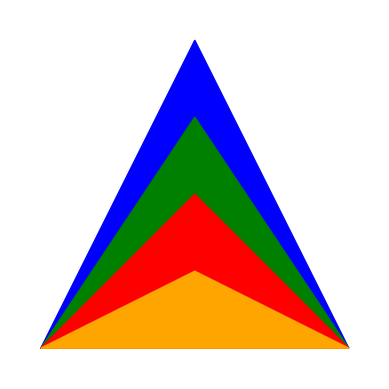

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Определение вершин треугольника
vertices = np.array([[0.5, 1], [0, 0], [1, 0]])

fig, ax = plt.subplots()

# Уровни треугольника
colors = ['blue', 'green', 'red', 'orange']
level_height = 0.25

for i, color in enumerate(colors):
    triangle = plt.Polygon(vertices * [1, (4-i)*level_height], color=color)
    ax.add_patch(triangle)

ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.set_aspect('equal')
ax.axis('off')

plt.show()


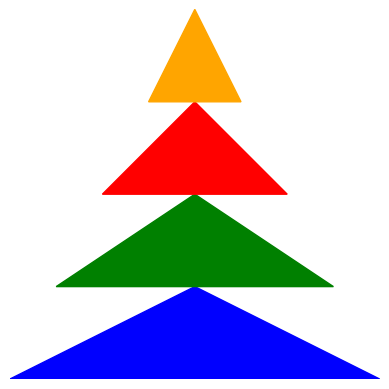

In [3]:
import matplotlib.pyplot as plt

# Определение уровней треугольника
levels = 4
colors = ['blue', 'green', 'red', 'orange']

# Создание фигуры и оси
fig, ax = plt.subplots()

# Определение высоты каждого уровня
height = 1 / levels

# Построение уровней
for i in range(levels):
    x = [0.5 - (0.5 - i * 0.5 / levels), 0.5 + (0.5 - i * 0.5 / levels), 0.5]
    y = [i * height, i * height, (i + 1) * height]
    plt.fill(x, y, color=colors[i])

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')

plt.show()



In [1]:
import plotly.graph_objects as go

# Определение вершин треугольника
vertices = [
    [0.5, 1],
    [0, 0],
    [1, 0]
]

# Цвета уровней
colors = ['blue', 'green', 'red', 'orange']

fig = go.Figure()

# Создание уровней треугольника
for i in range(4):
    level_vertices = [
        [0.5, 1 - i * 0.25],
        [0.5 - (0.5 * (1 - i * 0.25)), i * 0.25],
        [0.5 + (0.5 * (1 - i * 0.25)), i * 0.25],
    ]
    fig.add_trace(go.Scatter(
        x=[v[0] for v in level_vertices],
        y=[v[1] for v in level_vertices],
        fill='toself',
        fillcolor=colors[i],
        line=dict(color='rgba(0,0,0,0)')
    ))

fig.update_layout(
    showlegend=False,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    margin=dict(l=0, r=0, t=0, b=0)
)

fig.show()
